# Who doesn't love dogs? 🐕

## Excutive Summary
**EDA**: We will use Pandas to explore and Seaborn to visualize:
- Distribution of lifespans across breeds.
- Correlation between dog size and longevity.
- Common health problems per size category (small, medium, large).

In [163]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from collections import Counter

sns.set_theme(style="whitegrid")

Retrive the dataset from Kaggle

In [164]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marshuu/dog-breeds")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\truon\.cache\kagglehub\datasets\marshuu\dog-breeds\versions\5


File name is

In [165]:
file_name = print(os.listdir(path))
file_name

['dog_breeds.csv']


In [166]:
file_path = os.path.join(path, 'dog_breeds.csv')
dogs = pd.read_csv(file_path)
dogs.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-...","Hip dysplasia, obesity, ear infections"
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,"Loyal, intelligent, protective, confident, tra...","Hip dysplasia, elbow dysplasia, pancreatitis"
2,Bulldog,England,"White, Red",12-16,Brown,8-10,"Loyal, calm, gentle, brave","Skin allergies, respiratory issues, obesity"
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,"Intelligent, active, affectionate, hypoallergenic","Hip dysplasia, epilepsy, bladder stones"
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy"


In [167]:
dogs.duplicated().sum()

np.int64(0)

In [168]:
dogs.isna().sum()

Breed                     0
Country of Origin         0
Fur Color                 0
Height (in)               0
Color of Eyes             0
Longevity (yrs)           0
Character Traits          0
Common Health Problems    0
dtype: int64

The dataset is from **Kaggle** and is clean with no duplicates or missing values.

## EDA

### How many breeds are there and how are they distributed?

In [169]:
dogs['Breed'].nunique()

103

In [170]:
dogs['Breed'].value_counts()

Breed
Australian Shepherd      3
Gordon Setter            2
Greyhound                2
Basset Hound             2
Pug                      2
                        ..
Basenji                  1
Catahoula Leopard Dog    1
Miniature Shiba Inu      1
Belgian Tervuren         1
Pharaoh Hound            1
Name: count, Length: 103, dtype: int64

There are 103 dog breeds and the highest variety per breed is 3.

### Do smaller dog breeds really live longer than larger ones?

In [171]:
dogs.dtypes

Breed                     object
Country of Origin         object
Fur Color                 object
Height (in)               object
Color of Eyes             object
Longevity (yrs)           object
Character Traits          object
Common Health Problems    object
dtype: object

First we will need to create a numerical column for `Longevity`. We will take the average year for this.

Second, we will use Height to determin dogs' size.

In [172]:
def get_num(height, tail):
    """given a string for height range e.g 21-33 the function will 
    extract the min height or max height from the string and return it"""
    height_list = height.split('-')
    if tail == 'min':
        return height_list[0]
    if tail == 'max':
        return height_list[1]
    else:
        print("Please provide min or max for the second argument")

In [173]:
dog_min_longevity = dogs['Longevity (yrs)'].apply(lambda x: get_num(x, 'min')).astype(int)
dog_max_longevity = dogs['Longevity (yrs)'].apply(lambda x: get_num(x, 'max')).astype(int)
dog_avg_longevity = (dog_max_longevity + dog_min_longevity) / 2

In [174]:
dog_min_height = dogs['Height (in)'].apply(lambda x: get_num(x, 'min')).astype(int)
dog_max_height = dogs['Height (in)'].apply(lambda x: get_num(x, 'max')).astype(int)
dog_avg_height = (dog_min_height + dog_max_height) / 2

In [175]:
dogs['Average_lifespan'] = dog_avg_longevity
dogs['Average_height'] = dog_avg_height

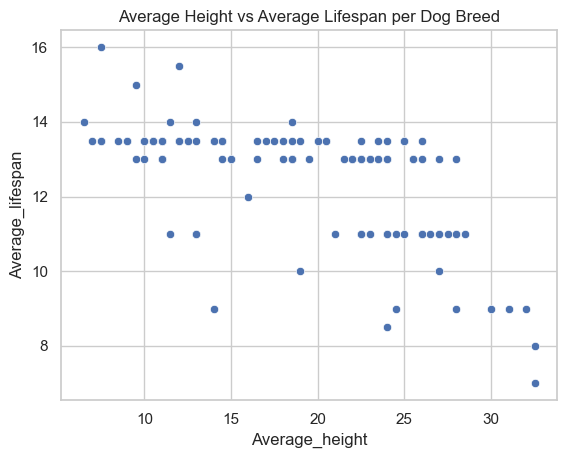

In [176]:
sns.scatterplot(data=dogs, x='Average_height', y='Average_lifespan')
plt.title('Average Height vs Average Lifespan per Dog Breed');

It looks like there is a negative correlation between average height and average life span per dog breed. Taller dogs (or dogs with bigger size) tend to live shorter lives

### How the life spans are distributed across breeds?

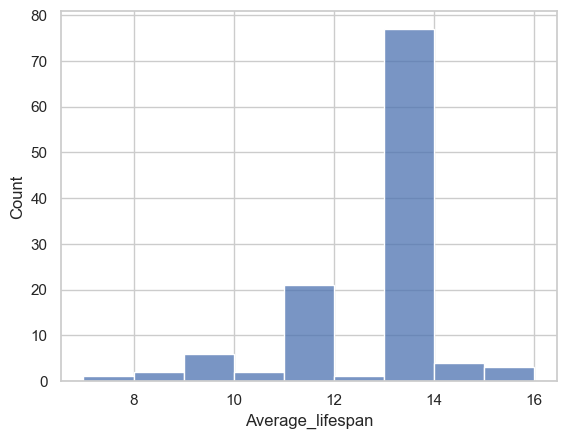

In [177]:
sns.histplot(data=dogs, x='Average_lifespan');

Most dogs live upto 13.5 year of life on average!

Let's categorize dog breed by size to see it clearer.

We will use this table as reference.

| Category | Height (inches) |
| -------- | --------------- |
| Small    | < 16 in         |
| Medium   | 16–22 in        |
| Large    | 23–27 in        |
| Giant    | > 27 in         |


In [178]:
def categorize_size(avg_height):
    if avg_height < 16:
        return 'small'
    if avg_height >= 16 and avg_height <= 22:
        return 'medium'
    if avg_height > 22 and avg_height <= 27:
        return 'large'
    else:
        return 'giant'

In [179]:
dogs['Size'] = dogs['Average_height'].apply(categorize_size)

<Axes: xlabel='Average_lifespan', ylabel='Density'>

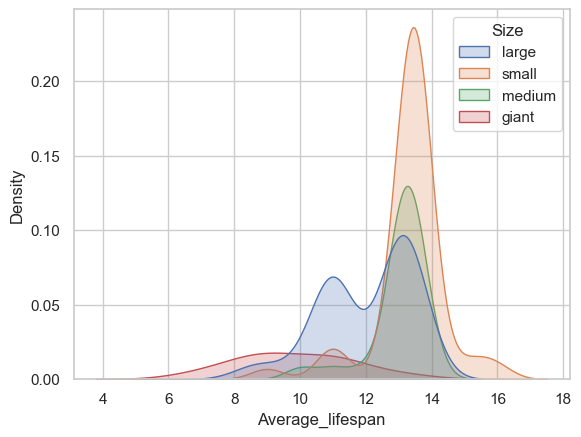

In [180]:
sns.kdeplot(data=dogs, x='Average_lifespan', hue='Size', fill=True)


As we can see, most medium and small breeds tend to live upto 13.5 years but there are a big number of large and giant breeds only make it to 10.5 years.

### What are the distributions/ frequencies of other variables

In [181]:
dogs['Color of Eyes'].value_counts()

Color of Eyes
Brown          108
Brown, Blue      7
Blue             1
Blue, Grey       1
Name: count, dtype: int64

Most breeds have brown eyes!

In [182]:
country_sorted = dogs['Country of Origin'].value_counts().index

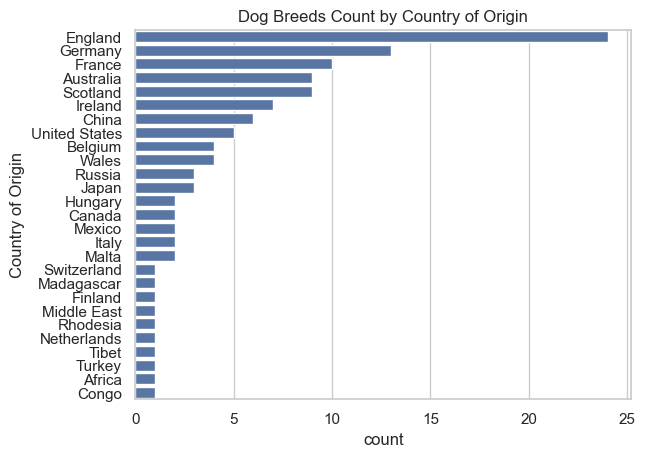

In [183]:
sns.countplot(data=dogs, y='Country of Origin', order=country_sorted)
plt.title('Dog Breeds Count by Country of Origin');

In [184]:
dogs['Country of Origin'].value_counts(normalize=True).head(5)

Country of Origin
England      0.205128
Germany      0.111111
France       0.085470
Australia    0.076923
Scotland     0.076923
Name: proportion, dtype: float64

4 out of 5 in the top 5 breeds count is from the Europe! That makes up to 46% of the total dog breeds!

### Common character traits / health problems by dog size

In [185]:
dogs.head(1)

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems,Average_lifespan,Average_height,Size
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-...","Hip dysplasia, obesity, ear infections",11.0,22.5,large


In [186]:
def text_blob(text_col):
    text_col = text_col.str.lower()
    text = ', '.join(np.array(text_col))
    text = text.replace(',', ' ')
    return text

In [187]:
text_blob(dogs[dogs['Size'] == 'small']['Character Traits'])

'loyal  calm  gentle  brave  intelligent  active  affectionate  hypoallergenic  curious  friendly  energetic  good-natured  loyal  energetic  confident  sensitive  loyal  playful  affectionate  social  charming  loyal  energetic  playful  curious  affectionate  playful  confident  good-natured  playful  affectionate  intelligent  social  affectionate  patient  gentle  good-natured  affectionate  intelligent  energetic  good-natured  affectionate  playful  good-natured  playful  energetic  intelligent  good-natured  intelligent  energetic  affectionate  good-natured  independent  intelligent  affectionate  good-natured  intelligent  active  affectionate  hypoallergenic  intelligent  active  affectionate  hypoallergenic  intelligent  energetic  playful  good-natured  intelligent  energetic  affectionate  good-natured  intelligent  energetic  playful  good-natured  intelligent  energetic  affectionate  good-natured  intelligent  energetic  playful  good-natured  intelligent  energetic  pl

In [188]:
small_dogs_char = text_blob(dogs[dogs['Size'] == 'small']['Character Traits'])
med_dogs_char = text_blob(dogs[dogs['Size'] == 'medium']['Character Traits'])
large_dogs_char = text_blob(dogs[dogs['Size'] == 'large']['Character Traits'])
giant_dogs_char = text_blob(dogs[dogs['Size'] == 'giant']['Character Traits'])

In [189]:
def make_color_func(topN, highlight_color="#4379AB"):
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word in topN:
            return highlight_color   # all topN words same color
        else:
            return "grey"
    return color_func

In [190]:
N = 3 # Specify top N

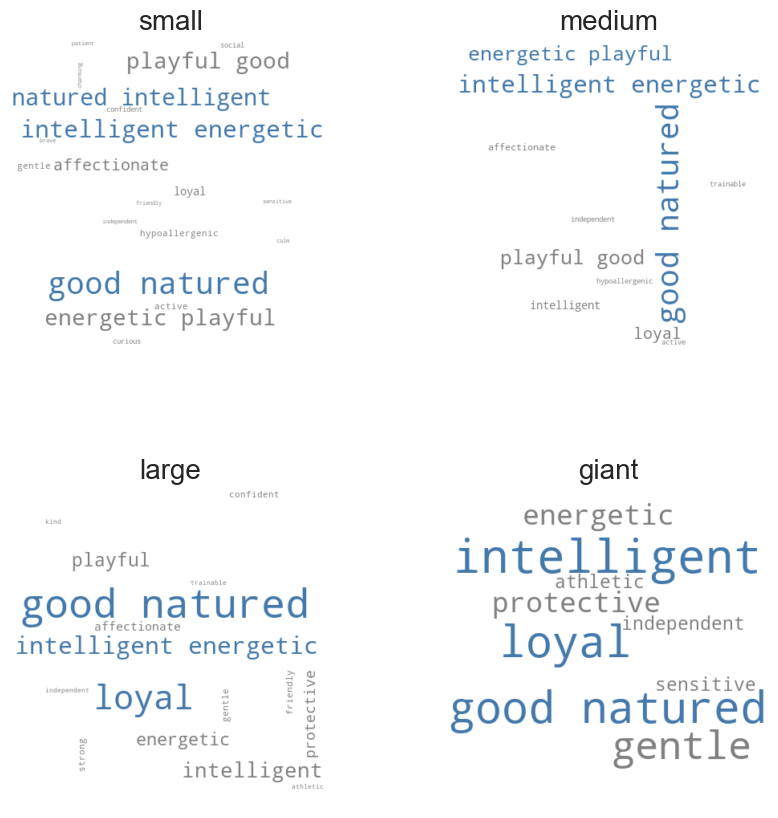

In [191]:
sizes = ['small', 'medium', 'large', 'giant'] 
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_rows*5, n_cols*5))

# flatten axes for easy iteration
axes = axes.flatten()

for ax, size in zip(axes, sizes):
    # 1) get text for this size
    text = text_blob(dogs[dogs['Size'] == size]['Character Traits'])
    
    # 2) generate word cloud
    wc = WordCloud(width=400, height=400, background_color="white").generate(text)
    topN = list(wc.words_.keys())[:N]   # words_ is ordered by frequency (highest first)
    wc_colored = wc.recolor(color_func=make_color_func(topN=topN))
    # 3) plot on the subplot
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"{size}", fontsize=20)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

> - A  common characteristics regardless of dog size are intelligent, good natured. 
> - Small-medium dogs are more energetic while large-giant dogs are loyal!

Let's do the same analysis for the common health problem

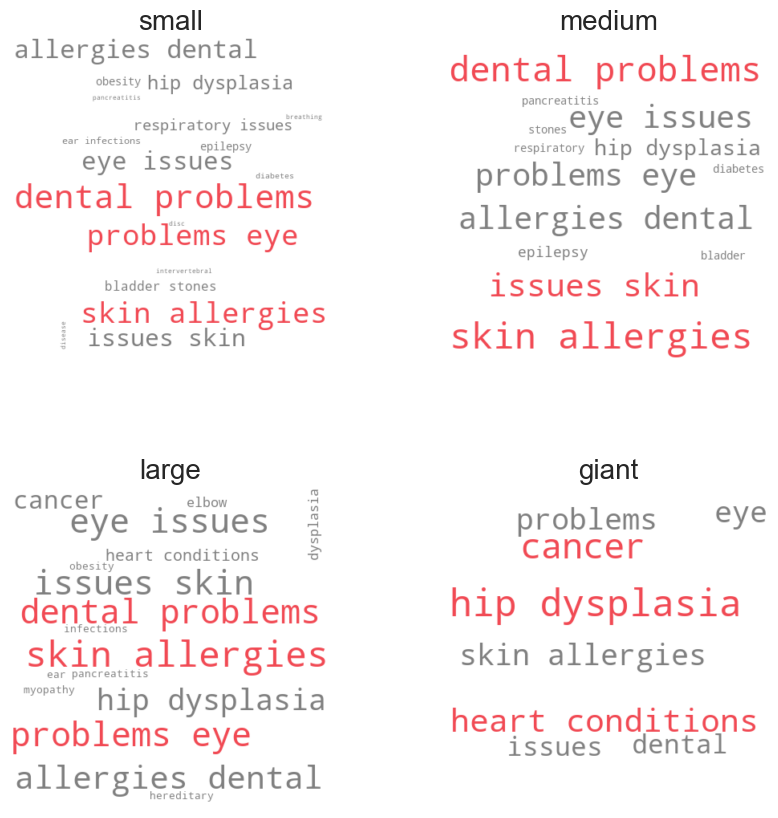

In [193]:
sizes = ['small', 'medium', 'large', 'giant'] 
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_rows*5, n_cols*5))

# flatten axes for easy iteration
axes = axes.flatten()

for ax, size in zip(axes, sizes):
    # 1) get text for this size
    text = text_blob(dogs[dogs['Size'] == size]['Common Health Problems'])
    
    # 2) generate word cloud
    wc = WordCloud(width=400, height=400, background_color="white").generate(text)
    topN = list(wc.words_.keys())[:N]   # words_ is ordered by frequency (highest first)
    wc_colored = wc.recolor(color_func=make_color_func(topN=topN, highlight_color='#F14A54'))
    # 3) plot on the subplot
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"{size}", fontsize=20)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

It seems that skin allergies and dental problems are quite common among small-medium-large breeds. Giant breeds' common issues are cancer, heart conditions and hip dysplasia.

Now that we have a good understanding about dog breeds in terms of sizes, lifespan, characteristics and common health problem! We can treat our dog friends with knowledge and confident or choose your next dog friend if you don't have one yet.

**Next steps** would be visualize dog breed dataset using Power BI and our target user for this would be someone who is interested in owning a dog.